In [1]:
import tensorflow
from tensorflow import keras

import numpy as np
import pandas as pd

imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

# Data Exploration

In [2]:
print(len(train_data))
print(len(test_data))

print(train_data[0])
print(f'len0: {len(train_data[0])}, len1:{len(train_data[1])}')

25000
25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
len0: 218, len1:189


In [3]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    # get corresponding key word from word_index dictionaly
    # default value = '?'
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(word_index.get('this'))

decode_review(train_data[0])

1646592/1641221 [==============================] - 0s 0us/step
14


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# Preprocessing

In [4]:
# Adjust data length

maxlen = 256
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value = word_index['<PAD>'], padding='post', maxlen=maxlen)
test_data  = keras.preprocessing.sequence.pad_sequences(test_data , value = word_index['<PAD>'], padding='post', maxlen=maxlen)

# Modeling

In [5]:
# tensorflowのEmbedding レイヤーは何をするか？
# https://qiita.com/9ryuuuuu/items/e4ee171079ffa4b87424

vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(train_data, train_labels, test_size=0.2)
print(len(X_tr))
print(len(X_te))
print(len(y_tr))
print(len(y_te))

20000
5000
20000
5000


In [9]:
history = model.fit(X_tr, y_tr, epochs=40, batch_size=512, validation_data=(X_te, y_te), verbose=1)

Epoch 1/40
40/40 [==============================] - 2s 23ms/step - loss: 0.6925 - accuracy: 0.5191 - val_loss: 0.6888 - val_accuracy: 0.7418
Epoch 2/40
40/40 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.7198 - val_loss: 0.6728 - val_accuracy: 0.7572
Epoch 3/40
40/40 [==============================] - 0s 11ms/step - loss: 0.6652 - accuracy: 0.7703 - val_loss: 0.6395 - val_accuracy: 0.7784
Epoch 4/40
40/40 [==============================] - 0s 11ms/step - loss: 0.6250 - accuracy: 0.7993 - val_loss: 0.5878 - val_accuracy: 0.7978
Epoch 5/40
40/40 [==============================] - 0s 11ms/step - loss: 0.5679 - accuracy: 0.8145 - val_loss: 0.5271 - val_accuracy: 0.8216
Epoch 6/40
40/40 [==============================] - 0s 11ms/step - loss: 0.5021 - accuracy: 0.8367 - val_loss: 0.4691 - val_accuracy: 0.8426
Epoch 7/40
40/40 [==============================] - 0s 10ms/step - loss: 0.4430 - accuracy: 0.8585 - val_loss: 0.4199 - val_accuracy: 0.8532
Epoch 8/40
40

In [10]:
model.evaluate(X_te, y_te, verbose=2)

157/157 - 0s - loss: 0.3034 - accuracy: 0.8916


[0.30342426896095276, 0.8916000127792358]

# History

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

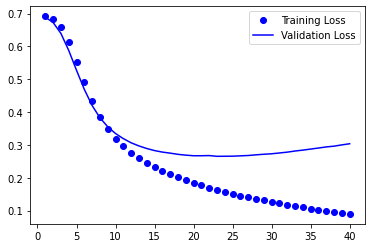

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(loss)+1)
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.show()